### Working with missing data

Notebook to study effects of mean and median imputation, and interpolation

In [1]:
import numpy as np
import pandas as pd
from pylab import *
import math

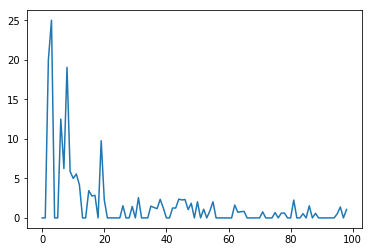

In [2]:
# Sensitivity to mean imputation

mean_change = []
for i in list(np.arange(10,1000,10)):
    dataset = np.random.binomial(20,0.01,i)
    mean_original = np.mean(dataset)
    dataset[np.random.randint(0,i*0.25)] = mean_original
    dataset[np.random.randint(i*0.25,i*0.5)] = mean_original
    dataset[np.random.randint(i*0.5,i*0.75)] = mean_original
    dataset[np.random.randint(i*0.75,i)] = mean_original
    mean_new = np.mean(dataset)
#     print mean_original, mean_new
    change = (np.abs(mean_original - mean_new)/mean_original)*100
    mean_change.append(change)
plt.plot(mean_change)
plt.show()
plt.clf()

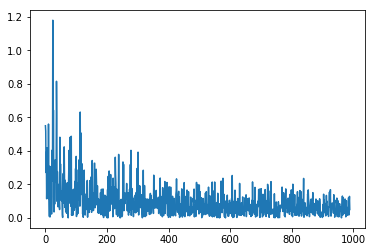

In [3]:
# Sensitivity to median imputation

median_change = []
for i in list(np.arange(1000,100000,100)):
    dataset = np.random.binomial(2000,0.01,i)
    median_original = np.median(dataset)
    dataset[np.random.randint(0,i*0.25)] = median_original
    dataset[np.random.randint(i*0.25,i*0.5)] = median_original
    dataset[np.random.randint(i*0.5,i*0.75)] = median_original
    dataset[np.random.randint(i*0.75,i)] = median_original
    median_new = np.mean(dataset)
    change = (np.abs(median_original - median_new)/median_original)*100
    median_change.append(change)
plt.plot(median_change)
plt.show()

### Interpolation of data

In [4]:
# Data dropping and interpolation sample
dataset = np.zeros([100,100])
for i in list(range(0,100)):
    for j in list(range(0,10)):
        dataset[i][j] = np.random.ranf()
dataset[4][4] = np.nan
dataset[2][7] = np.nan
datasetPd = pd.DataFrame(dataset)


In [5]:
print (len(datasetPd))
datasetPd.loc[:6,:].style.highlight_null()

100


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,0.0145913,0.730539,0.766162,0.703238,0.862576,0.992534,0.967591,0.259772,0.906071,0.571916,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.809336,0.707202,0.569966,0.350558,0.163395,0.0988867,0.581451,0.132004,0.142771,0.177282,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.50775,0.625478,0.903936,0.136286,0.424191,0.0342887,0.156778,nan,0.143963,0.498118,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.991579,0.789771,0.768331,0.351426,0.627668,0.595793,0.614649,0.340538,0.884405,0.86514,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.0912535,0.286227,0.430536,0.00215095,nan,0.727316,0.239141,0.509555,0.961317,0.966738,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0.697168,0.191482,0.641512,0.212326,0.942203,0.740293,0.595586,0.237502,0.734761,0.917608,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0.81434,0.920184,0.190803,0.298467,0.121067,0.543161,0.307469,0.40061,0.690064,0.967504,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
datasetPd.loc[:10,[4]]

,4
0,0.862576
1,0.163395
2,0.424191
3,0.627668
4,NaN
5,0.942203
6,0.121067
7,0.517889
8,0.727909
9,0.880904


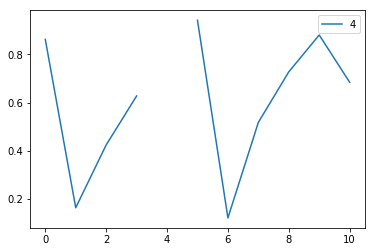

In [7]:
fig = datasetPd.loc[:10,[4]].plot()
# fig.figure

In [9]:
# drop the row with missing data
datasetPdNew = datasetPd.copy()
datasetPdNew.dropna(inplace=True)
print (len(datasetPdNew))
datasetPdNew.head()

98


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.014591,0.730539,0.766162,0.703238,0.862576,0.992534,0.967591,0.259772,0.906071,0.571916,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.809336,0.707202,0.569966,0.350558,0.163395,0.098887,0.581451,0.132004,0.142771,0.177282,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.991579,0.789771,0.768331,0.351426,0.627668,0.595793,0.614649,0.340538,0.884405,0.865140,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.697168,0.191482,0.641512,0.212326,0.942203,0.740293,0.595586,0.237502,0.734761,0.917608,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.814340,0.920184,0.190803,0.298467,0.121067,0.543161,0.307469,0.400610,0.690064,0.967504,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


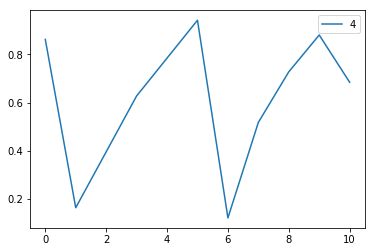

In [10]:
fig = datasetPdNew.loc[:10,[4]].plot()
# fig.figure

100


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.014591,0.730539,0.766162,0.703238,0.862576,0.992534,0.967591,0.259772,0.906071,0.571916,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.809336,0.707202,0.569966,0.350558,0.163395,0.098887,0.581451,0.132004,0.142771,0.177282,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.507750,0.625478,0.903936,0.136286,0.424191,0.034289,0.156778,0.236271,0.143963,0.498118,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.991579,0.789771,0.768331,0.351426,0.627668,0.595793,0.614649,0.340538,0.884405,0.865140,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.091254,0.286227,0.430536,0.002151,0.784935,0.727316,0.239141,0.509555,0.961317,0.966738,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.697168,0.191482,0.641512,0.212326,0.942203,0.740293,0.595586,0.237502,0.734761,0.917608,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.814340,0.920184,0.190803,0.298467,0.121067,0.543161,0.307469,0.400610,0.690064,0.967504,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.644450,0.362899,0.816639,0.471756,0.517889,0.822638,0.756482,0.056758,0.562865,0.383509,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.967529,0.410447,0.476574,0.097324,0.727909,0.051908,0.805921,0.326714,0.850100,0.852363,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.222534,0.414834,0.938166,0.796606,0.880904,0.637517,0.417637,0.923718,0.233762,0.467024,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


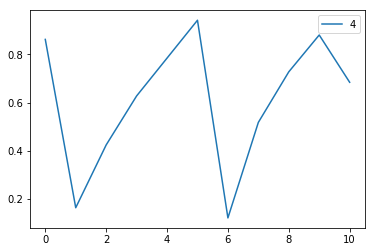

In [12]:
# interpolate
# http://pandas.pydata.org/pandas-docs/version/0.16.2/generated/pandas.DataFrame.interpolate.html

datasetPd = datasetPd.interpolate()
print (len(datasetPd))
fig = datasetPd.loc[:10,[4]].plot()
# fig.figure
datasetPd.head(10)

In [11]:
plt.close('all')

### Outliers

In [13]:
datasetPd.iloc[[6],4] = 2
datasetPd.head(10)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.014591,0.730539,0.766162,0.703238,0.862576,0.992534,0.967591,0.259772,0.906071,0.571916,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.809336,0.707202,0.569966,0.350558,0.163395,0.098887,0.581451,0.132004,0.142771,0.177282,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.507750,0.625478,0.903936,0.136286,0.424191,0.034289,0.156778,0.236271,0.143963,0.498118,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.991579,0.789771,0.768331,0.351426,0.627668,0.595793,0.614649,0.340538,0.884405,0.865140,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.091254,0.286227,0.430536,0.002151,0.784935,0.727316,0.239141,0.509555,0.961317,0.966738,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.697168,0.191482,0.641512,0.212326,0.942203,0.740293,0.595586,0.237502,0.734761,0.917608,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.814340,0.920184,0.190803,0.298467,2.000000,0.543161,0.307469,0.400610,0.690064,0.967504,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.644450,0.362899,0.816639,0.471756,0.517889,0.822638,0.756482,0.056758,0.562865,0.383509,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.967529,0.410447,0.476574,0.097324,0.727909,0.051908,0.805921,0.326714,0.850100,0.852363,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.222534,0.414834,0.938166,0.796606,0.880904,0.637517,0.417637,0.923718,0.233762,0.467024,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


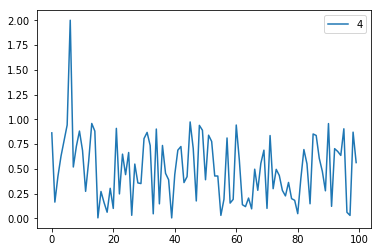

In [14]:
fig = datasetPd.loc[:,[4]].plot()
# fig.figure

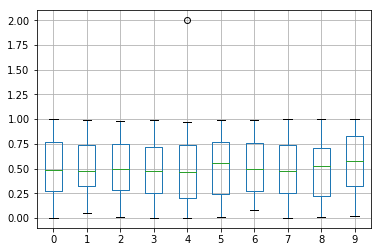

In [15]:
plt.cla()
fig = datasetPd.boxplot(column=list(range(10)))
# fig.figure

![Hist & Box plot](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/550px-Boxplot_vs_PDF.svg.png "Hist & Box plot")

![Hist & Box plot](http://researchhubs.com/uploads/skewness-by-boxplot.png "Hist & Box plot")

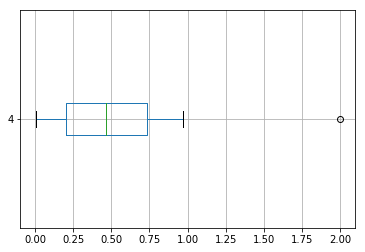

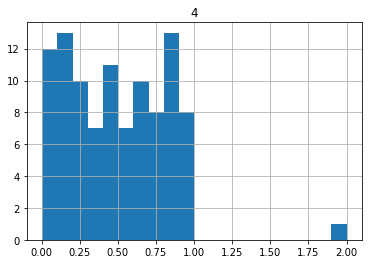

In [16]:
plt.cla()
fig = datasetPd.boxplot(column=list(range(4, 5)), vert=False)
fig = datasetPd.hist(column=list(range(4, 5)), bins=20)

http://www.physics.csbsju.edu/stats/box2.html

https://en.wikipedia.org/wiki/Box_plot


### [Optional] Search Engine Evaluation Metrics 

https://en.wikipedia.org/wiki/Discounted_cumulative_gain

A measure of ranking quality. In information retrieval, it is often used to measure effectiveness of web search engine algorithms or related applications. Using a graded relevance scale of documents in a search-engine result set, DCG measures the usefulness, or gain, of a document based on its position in the result list. The gain is accumulated from the top of the result list to the bottom, with the gain of each result discounted at lower ranks.

**Cumulative Gain**

The value computed with the CG function is unaffected by changes in the ordering of search results. That is, moving a highly relevant document {\displaystyle d_{i}} d_{i} above a higher ranked, less relevant, document {\displaystyle d_{j}} d_{{j}} does not change the computed value for CG. Based on the two assumptions made above about the usefulness of search results, DCG is used in place of CG for a more accurate measure.

**Discounted Cumulative Gain**

The premise of DCG is that highly relevant documents appearing lower in a search result list should be penalized as the graded relevance value is reduced logarithmically proportional to the position of the result. 


**Normalized DCG**

Search result lists vary in length depending on the query. Comparing a search engine's performance from one query to the next cannot be consistently achieved using DCG alone, so the cumulative gain at each position for a chosen value of {\displaystyle p} p should be normalized across queries. This is done by sorting all relevant documents in the corpus by their relative relevance, producing the maximum possible DCG through position {\displaystyle p} p, also called Ideal DCG (IDCG) through that position. For a query, the normalized discounted cumulative gain, or nDCG


In [16]:
positions = list(range(6))
relevency = np.array(list(range(6)))
# relevency = map(lambda r:np.random.randint(0,4), relevency)
relevency = [3, 2, 3, 0, 1, 2]

In [17]:
relevency

[3, 2, 3, 0, 1, 2]

In [18]:
# 2018-01-07 telescopeuser
log_i = map(lambda r:math.log(r+2,2), positions)
log_i = list(map(float, log_i))
log_i

[1.0,
 1.5849625007211563,
 2.0,
 2.321928094887362,
 2.584962500721156,
 2.807354922057604]

In [19]:
dcg = []
for i in list(range(len(relevency))):
    dcg.append(relevency[i]/log_i[i])
dcg

[3.0, 1.2618595071429148, 1.5, 0.0, 0.38685280723454163, 0.7124143742160444]

In [20]:
idcg = []
relevency.sort()
relevency.reverse()
for i in list(range(len(relevency))):
    print (relevency[i], log_i[i], i)
    idcg.append(relevency[i]/log_i[i])
idcg

3 1.0 0
3 1.5849625007211563 1
2 2.0 2
2 2.321928094887362 3
1 2.584962500721156 4
0 2.807354922057604 5


[3.0, 1.8927892607143721, 1.0, 0.8613531161467861, 0.38685280723454163, 0.0]

In [21]:
ndcg = np.sum(dcg)/np.sum(idcg)

In [22]:
ndcg

0.96080819433606157

---